# Cast and Mount Temperature Data at Fogler Passage (CTD)

In [ ]:
import onc
import helpers_ctd as h2

import os
# token = os.environ["GRACE_TOKEN"]
from dotenv import load_dotenv
load_dotenv()
token = os.getenv("ONC_TOKEN")

# Create ONC client
my_onc = onc.ONC(token)

## Long Term Mount Data

First, decide on your parameters. We will need a time frame, a location, and a sensor category.

### Fetch Data

> 1. Define parameter(s): time frame, location, sensor categories 

In [2]:
yr_22_start = "2022-01-01T00:00:00.000Z"
yr_22_end = "2023-01-01T00:00:00.000Z"

locationDeep = "FGPD" # locationCode for Folger Deep
locationPin = "FGPPN" # locationCode for Folger Pinnacle
sensorCategories = "temperature,density,conductivity"

> 2. Use these parameters to request your data. The 'get_property' function below takes your parameters as inputs and requests data via the API 'getScalarData' function.  It then gives us back this returned data in a 'data frame' with timestamps and sensor values for each sensor.

In [3]:
yr_22_mount_all_deep = h2.get_property(start=yr_22_start, end=yr_22_end, locationCode=locationDeep, sensorCategoryCodes=sensorCategories, resample=1800)
yr_22_mount_all_pin = h2.get_property(start=yr_22_start, end=yr_22_end, locationCode=locationPin, sensorCategoryCodes=sensorCategories, resample=1800)

Requesting CTD data at FGPD from 2022-01-01T00:00:00.000Z to 2023-01-01T00:00:00.000Z
Dataframe start: 2022-01-01 00:15:00+00:00 Dataframe end: 2022-12-31 23:45:00+00:00
Requesting CTD data at FGPPN from 2022-01-01T00:00:00.000Z to 2023-01-01T00:00:00.000Z
Dataframe start: 2022-01-01 00:15:00+00:00 Dataframe end: 2022-12-31 23:45:00+00:00


A data frame is essentially just a table of values that we can access by row and column. Below, we use the '.head()' command to display the first 5 rows of our dataframe for Folger Deep.

In [4]:
print(yr_22_mount_all_deep.head())

                  timestamp  conductivity      density  temperature
0 2022-01-01 00:15:00+00:00      3.483472  1024.643923    10.141187
1 2022-01-01 00:45:00+00:00      3.483922  1024.643305    10.145877
2 2022-01-01 01:15:00+00:00      3.482781  1024.641344    10.137708
3 2022-01-01 01:45:00+00:00      3.483621  1024.643227    10.143814
4 2022-01-01 02:15:00+00:00      3.483838  1024.643560    10.146381


### Subplot Conductivity, Temperature, Density

Now that we have the data in a format that is easy to work with, we can use it to plot. 

> 3. Use data from the data frame to plot. The following plots place the 'timestamp' column of the data frame on the x-axis and each of the other sensor values on the y-axis.

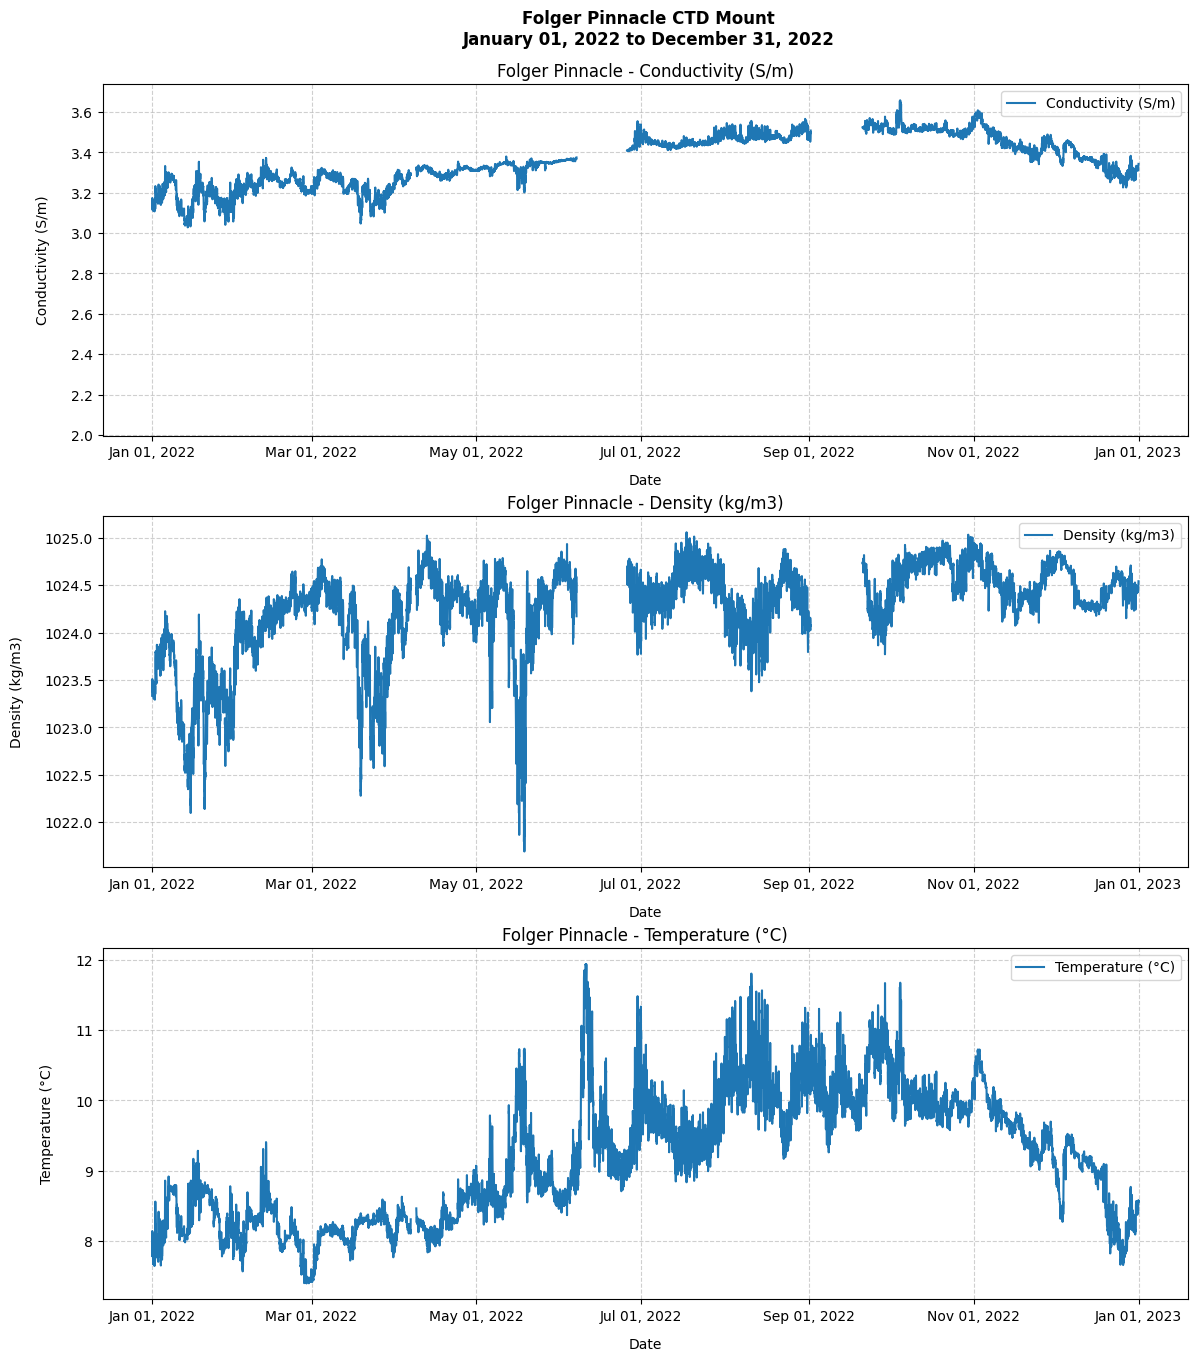

In [5]:
# FOLGER PINNACLE - CTD 2022
h2.subplot_longterm_mount(df=yr_22_mount_all_pin, locationCode="FGPPN")

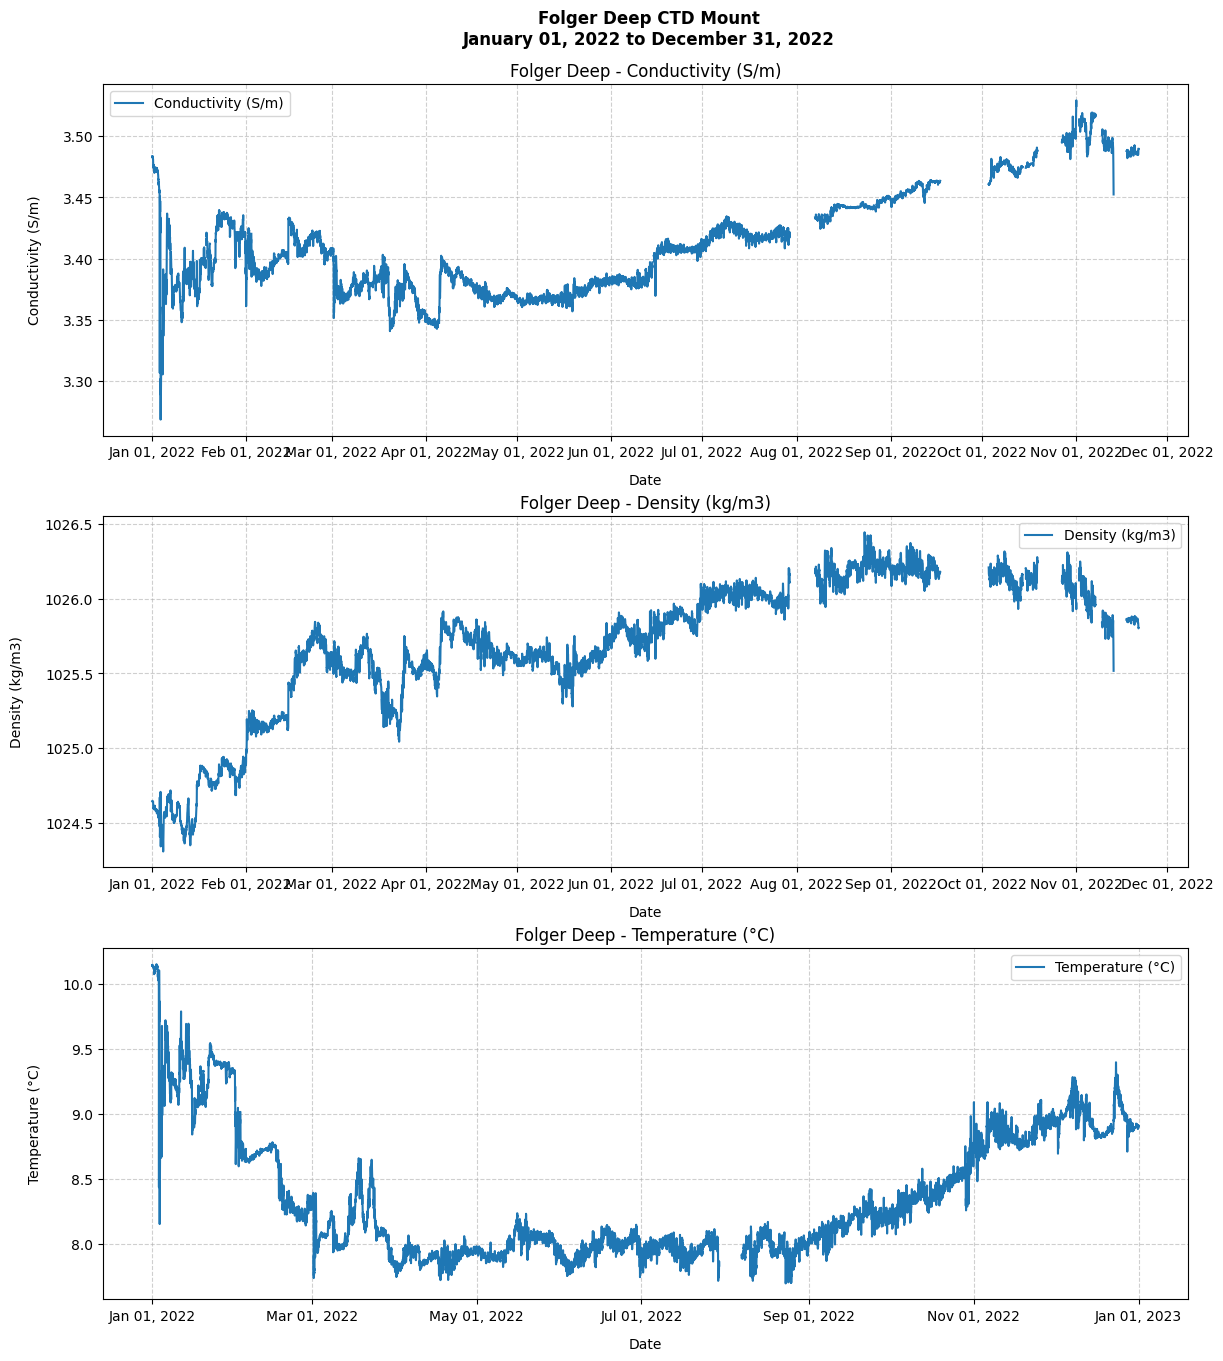

In [6]:
# FOLGER DEEP - CTD 2022
h2.subplot_longterm_mount(df=yr_22_mount_all_deep, locationCode="FGPD")

## Comparing Cast and Mount Data - Temperature

In [7]:
from IPython.display import Image, display
display(Image(filename='/Users/catherinebertozzi/jupyter-practice/deepnote/folger_passage.jpeg'))

### Fetch Data

> 1. Define your parameters: time frame, location, sensor categories

In [8]:
jul_11_start = "2023-07-11T17:00:00.000Z"
jul_11_end = "2023-07-11T22:30:00.000Z"

locationPinCast = "CF341" # locationCode for Folger Pinnacle Cast
locationDeepCast = "CF340" # locationCode for Folger Deep Cast

sensorCategoriesCastTemp = "temperature,depth"
sensorCategoriesMountTemp = "temperature"

> 2. Use these parameters to request your data. The 'get_property' function below takes your parameters as inputs and requests data via the API 'getScalarData' function.  It then gives us back this returned data in a 'data frame' with timestamps and sensor values for each sensor.

In [9]:
# FOLGER PINNACLE - TEMPERATURE
jul_cast_temp_pin = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode=locationPinCast, sensorCategoryCodes=sensorCategoriesCastTemp)
jul_mount_temp_pin = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode=locationPin, sensorCategoryCodes=sensorCategoriesMountTemp)

Requesting CTD data at CF341 from 2023-07-11T17:00:00.000Z to 2023-07-11T22:30:00.000Z
Dataframe start: 2023-07-11 17:12:51.030000+00:00 Dataframe end: 2023-07-11 20:15:39.880000+00:00
Requesting CTD data at FGPPN from 2023-07-11T17:00:00.000Z to 2023-07-11T22:30:00.000Z
Dataframe start: 2023-07-11 17:00:00.701000+00:00 Dataframe end: 2023-07-11 22:29:59.408000+00:00


In [10]:
# FOLGER DEEP - TEMPERATURE
jul_cast_temp_deep = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode=locationDeepCast, sensorCategoryCodes=sensorCategoriesCastTemp)
jul_mount_temp_deep = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode=locationDeep, sensorCategoryCodes=sensorCategoriesMountTemp)

Requesting CTD data at CF340 from 2023-07-11T17:00:00.000Z to 2023-07-11T22:30:00.000Z
Dataframe start: 2023-07-11 22:03:16.080000+00:00 Dataframe end: 2023-07-11 22:08:13.900000+00:00
Requesting CTD data at FGPD from 2023-07-11T17:00:00.000Z to 2023-07-11T22:30:00.000Z
Dataframe start: 2023-07-11 17:00:00.530000+00:00 Dataframe end: 2023-07-11 22:29:59.902000+00:00


### Subplot and Overlay Cast and Mount Data

> 3. 

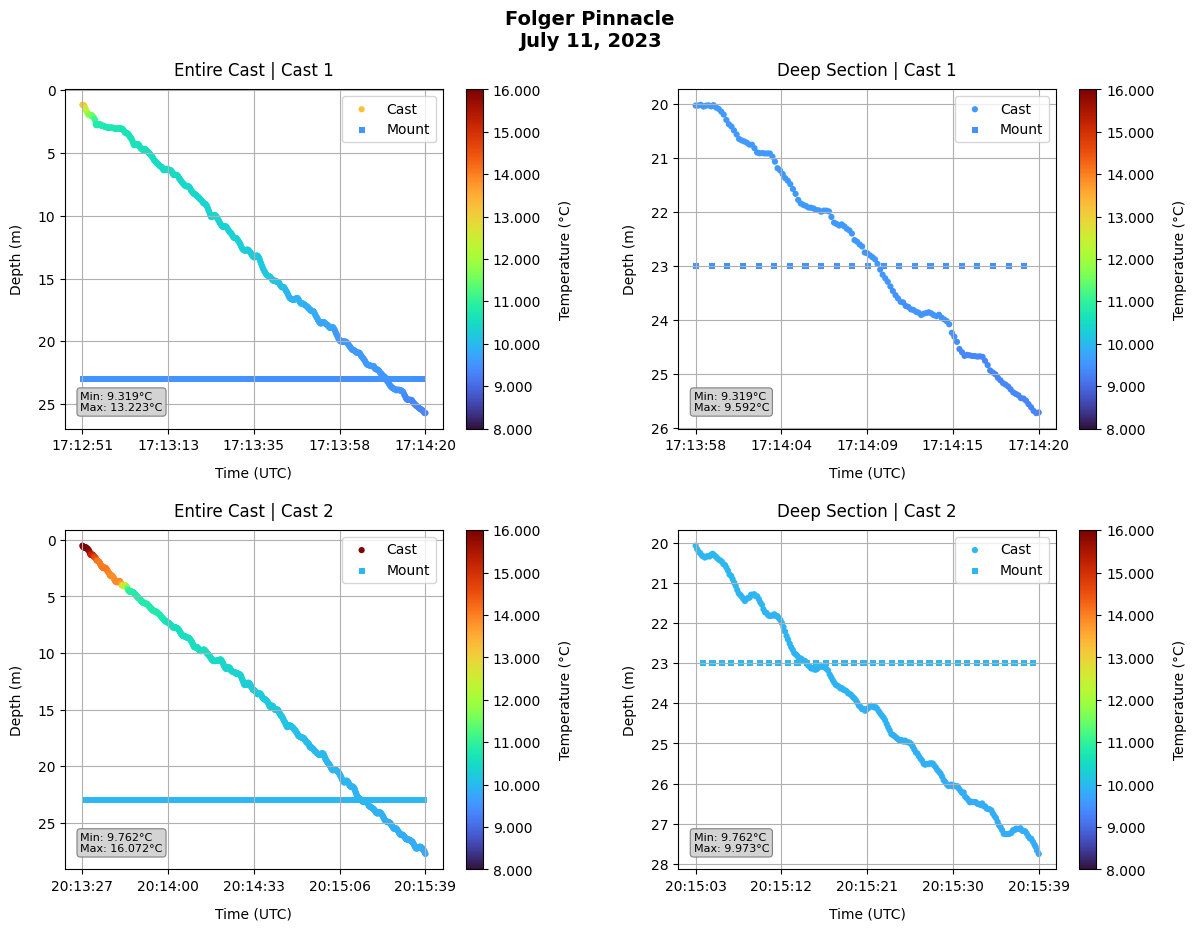

In [11]:
# FOLGER PINNACLE - TEMPERATURE
h2.subplot_cast_and_mount_temp_by_place([jul_mount_temp_pin,jul_cast_temp_pin], "FGPPN")

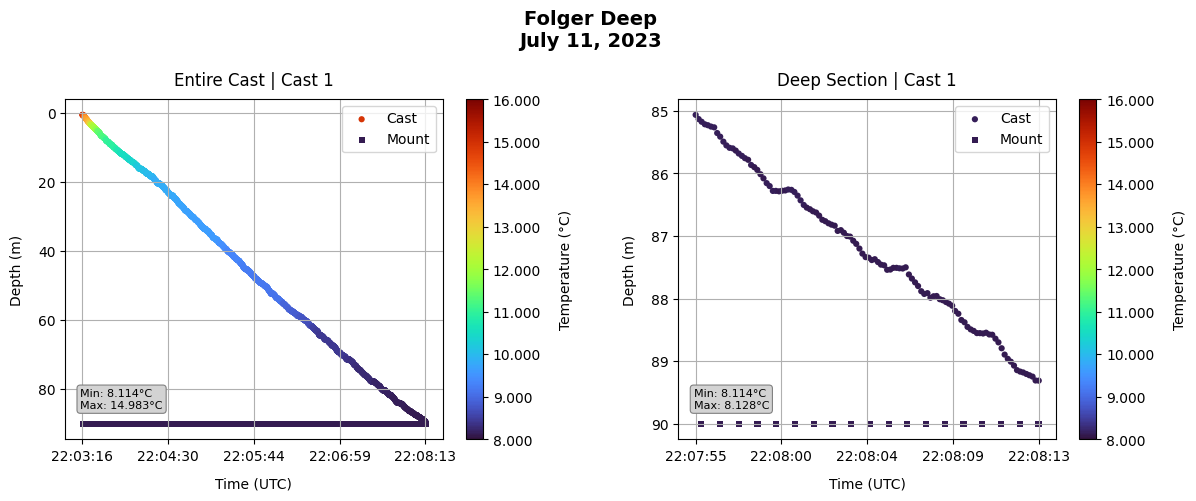

In [12]:
# FOLGER DEEP - TEMPERATURE
h2.subplot_cast_and_mount_temp_by_place([jul_mount_temp_deep,jul_cast_temp_deep], "FGPD")